In [2]:
import matplotlib.pyplot as plt
import pyart
import netCDF4
from glob import glob
import os
import numpy as np


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [27]:
def plot_imd_radar(fpath,ele,R,plotpath):
#Plotting Options Set in Function
#ele = 0 #Elevation
#R = 50#  #Min and Mac Range from Radar in km


    #Read Files and Setup Plotting
    radar=pyart.io.read(fpath)
    display = pyart.graph.RadarDisplay(radar)

    # set the figure title and show
    instrument_name = (radar.metadata['instrument_name'])[0:7]
    time_start = netCDF4.num2date(radar.time['data'][0], radar.time['units'])
    time_text = ' ' + time_start.strftime('%Y-%m-%d %H:%M:%SZ')

    elevation = radar.fixed_angle['data'][ele]
    ele_text= '%0.1f' % (elevation)

    title = instrument_name + time_text + ' Elevation %.1f' % (elevation)

 
    
    if np.round(elevation,0)>9.99:
        ele_folder ='ele'+ele_text[0]+ele_text[1]+'_'+ele_text[3]+ '/'
        ele_name= 'ele'+ele_text[0]+ele_text[1]+'_'+ele_text[3]
    else:
        ele_folder ='ele'+ele_text[0]+'_'+ele_text[2]+ '/'
        ele_name= 'ele'+ele_text[0]+'_'+ele_text[2]
        
    plot_file_name = instrument_name +'_'+ time_start.strftime('%Y-%m-%dT%H%M%SZ') +ele_name + '.png'

    loc_folder = instrument_name+ '/'
    
    R_folder = str(R)+'km'+ '/'

    fig_save_file_path = plotpath+loc_folder+ ele_folder + R_folder

    #Figure Options
    width=30 #in inches
    height=10 #in inches

    fig = plt.figure(figsize=(width, height))
    nrows=2
    ncols=5


    ax1 = fig.add_subplot(nrows,ncols,1)
    display.plot('dBZ',ele,ax=ax1, vmin=-32, vmax=16., title='Horizontal Reflectivity', colorbar_label=radar.fields['dBZ']['units'],
                 axislabels=('', 'North South distance from radar (km)'))
    display.set_limits((-R, R), (-R, R), ax=ax1)

    ax2 = fig.add_subplot(nrows,ncols,2)
    display.plot('ZDR', ele,ax=ax2, vmin=-2, vmax=10., title='Differential Reflectivity', colorbar_label=radar.fields['ZDR']['units'],
                 axislabels=('', ''), cmap = 'pyart_RefDiff')
    display.set_limits((-R, R), (-R, R), ax=ax2)


    ax3 = fig.add_subplot(nrows,ncols,3)
    display.plot('RhoHV', ele,ax=ax3, vmin=0, vmax=1., title='Cross Correlation Ratio', colorbar_label=radar.fields['RhoHV']['units'],
                 axislabels=('', ''), cmap = 'pyart_RefDiff')
    display.set_limits((-R, R), (-R, R), ax=ax3)


    ax4 = fig.add_subplot(nrows,ncols,4)
    display.plot('KDP', ele,ax=ax4, vmin=-2, vmax=5., title='Specific Differential Phase', colorbar_label=radar.fields['KDP']['units'],
                 axislabels=('', ''), cmap = 'pyart_Theodore16')
    display.set_limits((-R, R), (-R, R), ax=ax4)


    ax5 = fig.add_subplot(nrows,ncols,5)
    display.plot('PhiDP', ele,ax=ax5, vmin=-180, vmax=180., title='Differential Phase', colorbar_label=radar.fields['PhiDP']['units'],
                 axislabels=('', ''), cmap = 'pyart_Wild25')
    display.set_limits((-R, R), (-R, R), ax=ax5)


    ax6 = fig.add_subplot(nrows,ncols,6)
    display.plot('V',ele,ax=ax6, vmin=-16, vmax=16., title='Doppler Velocity', colorbar_label=radar.fields['V']['units'],
                 axislabels=('East West distance from radar (km)', 'North South distance from radar (km)'), cmap = 'pyart_BuDRd18')
    display.set_limits((-R, R), (-R, R), ax=ax6)


    ax7 = fig.add_subplot(nrows,ncols,7)
    display.plot('W', ele, ax=ax7, vmin=0, vmax=5., title='Spectrum Width', colorbar_label=radar.fields['W']['units'],
                 axislabels=('East West distance from radar (km)', '') , cmap = 'pyart_NWS_SPW')
    display.set_limits((-R, R), (-R, R), ax=ax7)

    
    ax8 = fig.add_subplot(nrows,ncols,8)
    display.plot('SNR', ele, ax=ax8, title='SNR', colorbar_label=radar.fields['SNR']['units'],
                 axislabels=('East West distance from radar (km)', ''), cmap = 'pyart_Carbone17')
    display.set_limits((-R, R), (-R, R), ax=ax8)

    
    ax9 = fig.add_subplot(nrows,ncols,9)
    display.plot('SQI', ele, ax=ax9, title='SQI', colorbar_label=radar.fields['SQI']['units'],
                 axislabels=('East West distance from radar (km)', ''), cmap='pyart_Carbone17')
    display.set_limits((-R, R), (-R, R), ax=ax9)


    ax10 = fig.add_subplot(nrows,ncols,10)
    display.plot('uPhiDP', ele,ax=ax10, vmin=-360, vmax= 360., title='Unfiltered Differential Phase', colorbar_label=radar.fields['uPhiDP']['units'],
                 axislabels=('East West distance from radar (km)', ''),cmap='pyart_Wild25')
    display.set_limits((-R, R), (-R, R), ax=ax10)

    display.plot_cross_hair(3.)
    plt.suptitle(title, fontsize=24)
    
    
    if not os.path.exists(fig_save_file_path):
        os.makedirs(fig_save_file_path)
    
    plt.savefig(fig_save_file_path+plot_file_name, dpi=100)
    
    plt.close()
    
    del radar
    del display




/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/20200401/salalah-oman-sband-PestDAR-20200401-000403.nc
/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/20200401/salalah-oman-sband-PestDAR-20200401-001402.nc
/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/20200401/salalah-oman-sband-PestDAR-20200401-001902.nc
/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/20200401/salalah-oman-sband-PestDAR-20200401-002903.nc
/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/20200401/salalah-oman-sband-PestDAR-20200401-003903.nc
/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/20200401/salalah-oman-sband-PestDAR-20200401-004402.nc
/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/20200401/salalah-oman-sband-PestDAR-20200401-004903.nc
/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/20200401/salalah-oman-sband-PestDAR-20200401-005403.nc
/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/20200401/salalah-oman-sband-PestDAR-20200401-005903.nc


KeyboardInterrupt: 

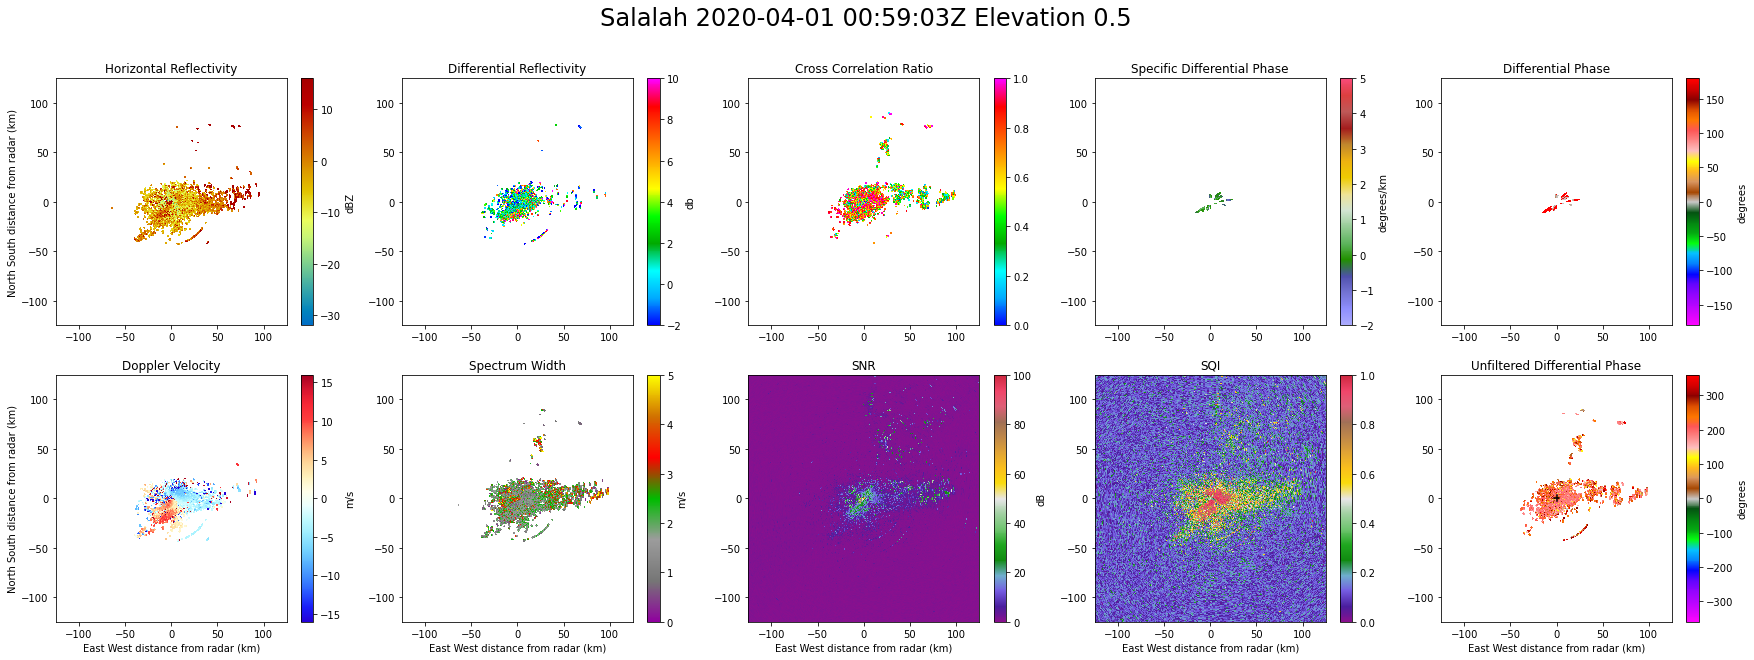

In [28]:
data_dir='/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/'
plotpath='/Volumes/Neely/PestDAR/Oman_Raw_Data_Plots/'

all_files=glob(data_dir+'**/' '*.nc',recursive=True)

radar=pyart.io.read(all_files[0])

rge=[25,50,75,100,125,150,175,200,225,250]



for f in all_files:
    print(f)
    for e in np.arange(0,len(radar.fixed_angle['data'])):
        for r in rge:
            plot_imd_radar(f,e,r,plotpath)
        

In [ ]:
plot_imd_radar(all_files[0],0,50,plotpath)